In [5]:
# download_sequences.py
from Bio import Entrez, SeqIO
import os
import shutil
import tempfile
import time

def download_all_sequences(virus_name, save_path):
    try:
        # Set your NCBI email
        Entrez.email = "ghorbani.abozar@gmail.com"

        # Search for all genome sequences of the specified virus in NCBI nucleotide database
        search_term = f"{virus_name}[Organism] AND genome[Title]"
        handle = Entrez.esearch(db="nucleotide", term=search_term, retmax=10)  # Adjust retmax as needed
        record = Entrez.read(handle)
        handle.close()

        if record["Count"] == "0":
            print(f"No records found for {virus_name}. Please check the virus name.")
            return

        # Create the save path if it doesn't exist
        if not os.path.exists(save_path):
            os.makedirs(save_path)

        # Fetch and save all sequences directly to the specified save path
        for seq_id in record["IdList"]:
            handle = Entrez.efetch(db="nucleotide", id=seq_id, rettype="fasta", retmode="text")
            seq_record = SeqIO.read(handle, "fasta")
            handle.close()

            # Save each sequence to the specified save path
            filename = f"{virus_name}_{seq_id}.fasta"
            filepath = os.path.join(save_path, filename)
            SeqIO.write(seq_record, filepath, "fasta")
            print(f"Sequence {seq_id} saved: {filepath}")

        print(f"All sequences downloaded and saved to {save_path}")
        return save_path

    except Entrez.EntrezError as e:
        print(f"NCBI error: {e}")
    except IOError as e:
        print(f"IO error: {e}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

if __name__ == "__main__":
    try:
        # Specify the virus name and the save path
        virus_name = "Tomato brown rugose fruit virus"
        save_path = r"C:\Users\AFRAA\OneDrive\Desktop\crispr\seqs"

        # Download all sequences directly to the specified save path
        download_all_sequences(virus_name, save_path)

        # Add a delay to avoid being blocked by the NCBI servers
        time.sleep(2)

    except KeyboardInterrupt:
        print("The download was interrupted by the user.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

Sequence 2869624817 saved: C:\Users\AFRAA\OneDrive\Desktop\crispr\seqs\Tomato brown rugose fruit virus_2869624817.fasta
Sequence 2847415975 saved: C:\Users\AFRAA\OneDrive\Desktop\crispr\seqs\Tomato brown rugose fruit virus_2847415975.fasta
Sequence 2847415967 saved: C:\Users\AFRAA\OneDrive\Desktop\crispr\seqs\Tomato brown rugose fruit virus_2847415967.fasta
Sequence 2847415959 saved: C:\Users\AFRAA\OneDrive\Desktop\crispr\seqs\Tomato brown rugose fruit virus_2847415959.fasta
Sequence 2720681348 saved: C:\Users\AFRAA\OneDrive\Desktop\crispr\seqs\Tomato brown rugose fruit virus_2720681348.fasta
Sequence 2720681343 saved: C:\Users\AFRAA\OneDrive\Desktop\crispr\seqs\Tomato brown rugose fruit virus_2720681343.fasta
Sequence 2837380557 saved: C:\Users\AFRAA\OneDrive\Desktop\crispr\seqs\Tomato brown rugose fruit virus_2837380557.fasta
Sequence 2837380552 saved: C:\Users\AFRAA\OneDrive\Desktop\crispr\seqs\Tomato brown rugose fruit virus_2837380552.fasta
Sequence 2837380547 saved: C:\Users\AFRA

In [6]:
from Bio import SeqIO
from Bio.Align import AlignInfo
from Bio import AlignIO
import subprocess
import os

# Define the directory
directory_path = r"C:\Users\AFRAA\OneDrive\Desktop\crispr\seqs"

# Automatically get all FASTA files in the directory
input_files = [f for f in os.listdir(directory_path) if f.endswith(".fasta")]

# Define file paths
combined_file = os.path.join(directory_path, "combined_sequences.fasta")
aligned_file = os.path.join(directory_path, "aligned_sequences.aln")
contig_file = os.path.join(directory_path, "contig.fasta")

# Path to the Clustal Omega executable
clustal_omega_path = r"E:\bioinformatic\Python\sec7\Data1\clustalomega\clustal-omega-1.2.2-win64\clustalo.exe"

# Combine all sequences into a single FASTA file for alignment
def combine_fasta_files(directory_path, input_files, output_file):
    if not input_files:
        print("No FASTA files found in the directory.")
        return False
    with open(output_file, 'w') as outfile:
        for filename in input_files:
            filepath = os.path.join(directory_path, filename)
            with open(filepath) as infile:
                outfile.write(infile.read())
    return True

# Run Clustal Omega for multiple sequence alignment using subprocess
def run_clustal_omega(input_file, output_file):
    try:
        command = [
            clustal_omega_path, "-i", input_file, "-o", output_file,
            "--outfmt=clustal", "--auto", "-v", "--force"
        ]
        result = subprocess.run(command, check=True, capture_output=True, text=True)
        print("Clustal Omega alignment completed successfully.")
        print(result.stdout)
    except subprocess.CalledProcessError as e:
        print("Error running Clustal Omega:", e.stderr)
        raise

# Generate a consensus sequence (contig) from the alignment
def generate_contig(aligned_file, contig_file):
    alignment = AlignIO.read(aligned_file, "clustal")
    summary_align = AlignInfo.SummaryInfo(alignment)
    consensus = summary_align.dumb_consensus()

    with open(contig_file, "w") as f:
        f.write(f">Consensus_Sequence\n{str(consensus)}\n")

# Main function
def main():
    if not input_files:
        print("No FASTA files found. Exiting.")
        return

    if combine_fasta_files(directory_path, input_files, combined_file):
        print("Combined sequences into a single FASTA file.")

        run_clustal_omega(combined_file, aligned_file)
        print("Alignment completed and saved to file.")

        generate_contig(aligned_file, contig_file)
        print(f"Consensus sequence saved to {contig_file}.")

# Run script
if __name__ == "__main__":
    main()


Combined sequences into a single FASTA file.
Clustal Omega alignment completed successfully.
Using 16 threads
Read 10 sequences (type: DNA) from C:\Users\AFRAA\OneDrive\Desktop\crispr\seqs\combined_sequences.fasta
not more sequences (10) than cluster-size (100), turn off mBed
Setting options automatically based on input sequence characteristics (might overwrite some of your options).
Auto settings: Enabling mBed.
Auto settings: Setting iteration to 1.
Using 9 seeds (chosen with constant stride from length sorted seqs) for mBed (from a total of 10 sequences)
Calculating pairwise ktuple-distances...
Ktuple-distance calculation progress: 0 % (0 out of 54)
Ktuple-distance calculation progress: 1 % (1 out of 54)
Ktuple-distance calculation progress: 3 % (2 out of 54)
Ktuple-distance calculation progress: 5 % (3 out of 54)
Ktuple-distance calculation progress: 7 % (4 out of 54)
Ktuple-distance calculation progress: 9 % (5 out of 54)
Ktuple-distance calculation progress: 11 % (6 out of 54)
Kt

D:\Anaconda\Lib\site-packages\Bio\Align\AlignInfo.py:62: BiopythonDeprecationWarning: The `dumb_consensus` method is deprecated and will be removed in a future release of Biopython. As an alternative, you can convert the multiple sequence alignment object to a new-style Alignment object by via its `.alignment` property, and then create a Motif object. You can then use the `.consensus` or `.degenerate_consensus` property of the Motif object to get a consensus sequence. For more control over how the consensus sequence is calculated, you can call the `calculate_consensus` method on the `.counts` property of the Motif object. This is an example for a multiple sequence alignment `msa` of DNA nucleotides:
>>> from Bio.Seq import Seq
>>> from Bio.SeqRecord import SeqRecord
>>> from Bio.Align import MultipleSeqAlignment
>>> from Bio.Align.AlignInfo import SummaryInfo
>>> msa = MultipleSeqAlignment([SeqRecord(Seq('ACGT')),
...                             SeqRecord(Seq('ATGT')),
...             

Consensus sequence saved to C:\Users\AFRAA\OneDrive\Desktop\crispr\seqs\contig.fasta.


In [13]:
import os

def clean_contig_sequence():
    input_file = r"C:\Users\AFRAA\OneDrive\Desktop\crispr\seqs\contig.fasta"
    output_file = r"C:\Users\AFRAA\OneDrive\Desktop\crispr\seqs\cleaned_contig.fasta"

    # Check if input file exists
    if not os.path.exists(input_file):
        print(f"Error: Input file '{input_file}' not found.")
        return

    # Read the contig sequence
    with open(input_file, "r") as f:
        lines = f.readlines()

    if not lines:
        print("Error: Contig file is empty.")
        return

    # Extract the sequence (ignoring the FASTA header)
    fasta_header = lines[0].strip()  # First line is the header
    sequence = "".join(lines[1:]).replace("\n", "").strip()  # Merge sequence lines

    # Keep only valid nucleotides (A, T, G, C)
    valid_nucleotides = {"A", "T", "G", "C"}
    cleaned_sequence = "".join([char if char in valid_nucleotides else "" for char in sequence])

    if not cleaned_sequence:
        print("Error: No valid nucleotides found in sequence.")
        return

    # Write the cleaned sequence to the output file
    with open(output_file, "w") as f:
        f.write(fasta_header + "\n")  # Write the FASTA header
        f.write(cleaned_sequence + "\n")  # Write the cleaned sequence

    print(f"✅ Cleaned consensus sequence saved to: {output_file}")

# Run the function
clean_contig_sequence()


✅ Cleaned consensus sequence saved to: C:\Users\AFRAA\OneDrive\Desktop\crispr\seqs\cleaned_contig.fasta


In [16]:
import os
from Bio import SeqIO

def check_and_convert_to_rna(file_path):
    """Check if the sequence is DNA, convert to RNA if needed, and save it."""
    output_file = os.path.join(os.path.dirname(file_path), "converted_rna.fasta")

    # Check if file exists
    if not os.path.exists(file_path):
        print(f"❌ Error: File not found: {file_path}")
        return

    # Read the sequence
    with open(file_path, "r") as file:
        record = next(SeqIO.parse(file, "fasta"))
        sequence = str(record.seq).upper()

    # Check if it's RNA (contains U, no T)
    if "U" in sequence and "T" not in sequence:
        print("✅ The sequence is already RNA. No conversion needed.")
        return

    # Convert DNA to RNA (Replace T with U)
    rna_sequence = sequence.replace("T", "U")

    # Save converted RNA sequence
    with open(output_file, "w") as file:
        file.write(f">{record.id}_converted_to_RNA\n")
        file.write(rna_sequence + "\n")

    print(f"✅ DNA converted to RNA and saved as: {output_file}")

# Define file path
file_path = r"C:\Users\AFRAA\OneDrive\Desktop\crispr\seqs\cleaned_contig.fasta"

# Run the function
check_and_convert_to_rna(file_path)


✅ DNA converted to RNA and saved as: C:\Users\AFRAA\OneDrive\Desktop\crispr\seqs\converted_rna.fasta


In [5]:
import re
import os
import pandas as pd
import random
from Bio import SeqIO
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class GuideRNA:
    def __init__(self, sequence):
        self.sequence = sequence

    def is_valid_guideline(self, gRNA):
        """Check if gRNA follows basic constraints."""
        length = len(gRNA)
        gc_content = (gRNA.count('G') + gRNA.count('C')) / length
        has_repeats = bool(re.search(r'(AAAA|TTTT|CCCC|GGGG)', gRNA))
        return length, gc_content, has_repeats

    def design_gRNAs(self, sequence, length_range=(23, 28)):
        """Generate potential gRNA candidates."""
        gRNA_candidates = []
        for i in range(len(sequence) - min(length_range) + 1):
            for length in range(length_range[0], length_range[1] + 1):
                gRNA = sequence[i:i + length]
                length, gc_content, has_repeats = self.is_valid_guideline(gRNA)
                if 0.4 <= gc_content <= 0.6 and not has_repeats:
                    seed_region = gRNA[10:18] if len(gRNA) >= 18 else ""
                    gRNA_candidates.append((gRNA, length, gc_content, seed_region))
        return gRNA_candidates

    def generate_synthetic_data(self, training_data_file):
        """Generate synthetic training data if no dataset exists."""
        if not os.path.exists(training_data_file):
            print("Generating synthetic training data...")
            data = []
            for _ in range(500):  # Generate 500 synthetic samples
                size = random.randint(23, 28)
                gc_content = round(random.uniform(0.3, 0.7), 2)
                effective = 1 if 0.4 <= gc_content <= 0.6 else 0  # Basic rule
                data.append([size, gc_content, effective])
            
            df = pd.DataFrame(data, columns=['Size', 'GC Content (%)', 'Effective'])
            df.to_csv(training_data_file, sep='\t', index=False)
            print(f"Synthetic training data saved to {training_data_file}")

    def train_ml_model(self, data_file):
        """Train a machine learning model on past gRNA effectiveness data."""
        self.generate_synthetic_data(data_file)
        df = pd.read_csv(data_file, sep='\t')
        X = df[['Size', 'GC Content (%)']]
        y = df['Effective']  # 1 (good) and 0 (bad)
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Model trained with accuracy: {accuracy:.2f}")
        return model

    def main(self, fasta_file, output_path, training_data_file):
        """Process input sequence, generate gRNAs, and predict effectiveness."""
        if not os.path.exists(fasta_file):
            print(f"FASTA file not found: {fasta_file}")
            return
        
        model = self.train_ml_model(training_data_file)
        sequence = str(next(SeqIO.parse(fasta_file, "fasta")).seq)
        gRNAs = self.design_gRNAs(sequence)
        
        if not gRNAs:
            print("No valid gRNA candidates found.")
            return
        
        output_file = os.path.join(output_path, "guideRNA_predictions.tsv")
        with open(output_file, 'w') as file:
            file.write("Guide RNA\tSeed Region (11-18)\tSize\tGC Content (%)\tPrediction\n")
            for gRNA, size, gc_content, seed_region in gRNAs:
                input_data = pd.DataFrame([[size, gc_content]], columns=['Size', 'GC Content (%)'])
                prediction = model.predict(input_data)[0]
                file.write(f"{gRNA}\t{seed_region}\t{size}\t{gc_content:.2f}\t{prediction}\n")
        
        print(f"Predicted guide RNAs saved to {output_file}")

# Paths to files
fasta_file_path = r"C:\Users\AFRAA\OneDrive\Desktop\crispr\seqs\converted_rna.fasta"
output_path = r"C:\Users\AFRAA\OneDrive\Desktop\crispr\seqs"
training_data_file = r"C:\Users\AFRAA\OneDrive\Desktop\crispr\seqs\training_data.tsv"

guide_rna_designer = GuideRNA("")
guide_rna_designer.main(fasta_file_path, output_path, training_data_file)


Model trained with accuracy: 1.00
Predicted guide RNAs saved to C:\Users\AFRAA\OneDrive\Desktop\crispr\seqs\guideRNA_predictions.tsv


In [2]:
import pandas as pd
from Bio import SeqIO
from Bio.Seq import Seq
from fuzzysearch import find_near_matches

def load_reference_genome(reference):
    """Load the reference genome from a FASTA file."""
    with open(reference, "r") as fasta_file:
        for record in SeqIO.parse(fasta_file, "fasta"):
            return str(record.seq)  # Return the sequence as a string

def rna_to_dna(guide_rna):
    """Convert RNA sequence to DNA by transcribing it."""
    return str(Seq(guide_rna).transcribe())  # RNA to corresponding DNA sequence

def check_off_target(guide, reference_sequence, max_mismatches=3):
    """Check for the number of off-target matches in the reference sequence."""
    matches = find_near_matches(guide, reference_sequence, max_l_dist=max_mismatches)
    return len(matches)  # Return the count of matches found

def main():
    # Load the guide RNA data from TSV file
    input_file = r"C:\Users\AFRAA\OneDrive\Desktop\crispr\seqs\guideRNA_predictions.tsv"
    df = pd.read_csv(input_file, sep='\t')
    
    # Reference genome path
    reference_genome = r"C:\Users\AFRAA\OneDrive\Desktop\crispr\Ref.fa"
    
    # Load the reference genome sequence
    reference_sequence = load_reference_genome(reference_genome)
    
    # Ensure the 'Off-target' column exists
    df['Off-target'] = 0
    
    # Iterate through each guide RNA and check for off-targets
    for index, row in df.iterrows():
        guide_rna = row['Guide RNA']
        
        # Convert the guide RNA to DNA for matching
        guide_dna = rna_to_dna(guide_rna)

        # Check matches in the forward strand of the DNA reference
        off_target_count_forward = check_off_target(guide_dna, reference_sequence)
        
        # Check matches in the reverse complementary strand of the DNA reference
        reverse_complement_reference = str(Seq(reference_sequence).reverse_complement())
        off_target_count_reverse = check_off_target(guide_dna, reverse_complement_reference)

        # Total off-target count is the sum of both checks
        total_off_target_count = off_target_count_forward + off_target_count_reverse
        df.loc[index, 'Off-target'] = total_off_target_count
    
    # Save the results to a new TSV file
    output_file = r"C:\Users\AFRAA\OneDrive\Desktop\crispr\seqs\Offtarget.tsv"
    df.to_csv(output_file, sep='\t', index=False)

    print("Off-target analysis complete. Results saved to:", output_file)

if __name__ == "__main__":
    main()

Off-target analysis complete. Results saved to: C:\Users\AFRAA\OneDrive\Desktop\crispr\seqs\Offtarget.tsv


In [3]:
import pandas as pd
from Bio import SeqIO

# Paths to files
input_tsv_path = r"C:\Users\AFRAA\OneDrive\Desktop\crispr\seqs\Offtarget.TSV"
ref_genome_path = r"C:\Users\AFRAA\OneDrive\Desktop\crispr\Tomatovirus.fasta"
output_tsv_path = r"C:\Users\AFRAA\OneDrive\Desktop\crispr\seqs\Virusofftarget.tsv"

# Read the guide RNAs from the TSV file
guide_data = pd.read_csv(input_tsv_path, sep='\t')

# Load the reference virus genomes and extract their sequences
virus_sequences = {}
for record in SeqIO.parse(ref_genome_path, "fasta"):
    virus_sequences[record.id] = str(record.seq)  # Store virus name and DNA sequence

# Function to find off-target matches
def find_off_targets(seed_region, virus_sequences):
    # Convert RNA seed region to DNA (U to T)
    seed_dna = seed_region.replace('U', 'T')
    
    matches = []
    for virus_name, sequence in virus_sequences.items():
        # Check for a complete match of the seed DNA in the virus sequence
        if seed_dna in sequence:
            matches.append(virus_name)
    return ', '.join(matches) if matches else 'None'

# Process each guide RNA in the DataFrame
guide_data['Virus Off-target'] = guide_data['Seed Region (11-18)'].apply(lambda x: find_off_targets(x, virus_sequences))

# Save the updated DataFrame to a new TSV file
guide_data.to_csv(output_tsv_path, sep='\t', index=False)

print(f"Analysis complete. Results saved to {output_tsv_path}.")

Analysis complete. Results saved to C:\Users\AFRAA\OneDrive\Desktop\crispr\seqs\Virusofftarget.tsv.


In [5]:
import pandas as pd
from Bio import SeqIO
import pandas as pd
from Bio import SeqIO

# Paths to files
input_tsv_path = r"C:\Users\AFRAA\OneDrive\Desktop\crispr\seqs\Offtarget.TSV"
ref_genome_path = r"C:\Users\AFRAA\OneDrive\Desktop\crispr\Tomatovirus.fasta"
output_tsv_path = r"C:\Users\AFRAA\OneDrive\Desktop\crispr\seqs\Virusofftarget.tsv"

# Read the guide RNAs from the TSV file
guide_data = pd.read_csv(input_tsv_path, sep='\t')

# Load the reference virus genomes and extract their sequences
virus_sequences = {}
for record in SeqIO.parse(ref_genome_path, "fasta"):
    virus_sequences[record.id] = str(record.seq)  # Store virus name and DNA sequence

# Function to find off-target matches
def find_off_targets(seed_region, virus_sequences):
    # Convert RNA seed region to DNA (U to T)
    seed_dna = seed_region.replace('U', 'T')
    
    matches = []
    for virus_name, sequence in virus_sequences.items():
        # Check for a complete match of the seed DNA in the virus sequence
        if seed_dna in sequence:
            matches.append(virus_name)
    return ', '.join(matches) if matches else 'None'

# Process each guide RNA in the DataFrame
guide_data['Virus Off-target'] = guide_data['Seed Region (11-18)'].apply(lambda x: find_off_targets(x, virus_sequences))

# Save the updated DataFrame to a new TSV file
guide_data.to_csv(output_tsv_path, sep='\t', index=False)

print(f"Analysis complete. Results saved to {output_tsv_path}.")
# Paths to your input files
tsv_file = r'C:\Users\AFRAA\OneDrive\Desktop\crispr\seqs\Virusofftarget.TSV'
fasta_file = r'C:\Users\AFRAA\OneDrive\Desktop\crispr\seqs\Seq.fasta'
output_file = r'C:\Users\AFRAA\OneDrive\Desktop\crispr\seqs\Conserved.tsv'

# Read TSV file into a pandas DataFrame
df = pd.read_csv(tsv_file, sep='\t')

# Read FASTA file to get alignment sequences (as RNA sequences)
alignment_seqs = {rec.id: str(rec.seq).replace('T', 'U') for rec in SeqIO.parse(fasta_file, 'fasta')}

# Function to check mismatches for the seed region across all strains
def check_conserved_match(seed, alignment_seqs):
    seed_length = len(seed)
    total_mismatches = 0

    for seq in alignment_seqs.values():
        min_mismatches = seed_length  # Start with the maximum possible mismatches
        for i in range(len(seq) - seed_length + 1):
            region = seq[i:i + seed_length]
            mismatch_count = sum(1 for a, b in zip(seed, region) if a != b)
            if mismatch_count < min_mismatches:
                min_mismatches = mismatch_count
        total_mismatches += min_mismatches

    return total_mismatches

# Apply the function to each row in the DataFrame
df['conservedMISSMatch'] = df['Seed Region (11-18)'].apply(lambda seed: check_conserved_match(seed, alignment_seqs))

# Save the DataFrame to a new TSV file
df.to_csv(output_file, sep='\t', index=False)

print(f"Output saved to {output_file}")


Output saved to C:\Users\AFRAA\OneDrive\Desktop\crispr\seqs\Conserved.tsv


In [6]:
import pandas as pd

def reverse_complement_sequence(seq):
    # Get the complement of the RNA sequence (A -> U, U -> A, C -> G, G -> C)
    complement = {'A': 'U', 'U': 'A', 'C': 'G', 'G': 'C'}
    # Get the reversed sequence of the complemented nucleotides
    return ''.join(complement[nuc] for nuc in reversed(seq))

def main(input_path, output_path):
    # Load the TSV file into a pandas DataFrame
    df = pd.read_csv(input_path, sep='\t')

    # Provide DR sequences
    dr_sequences = {
        'LwCas13a': 'GAUUUAGACUACCCCAAAAACGAAGGGGACUAAAAC',
        'PspCas13b': 'GUUGUGGAAGGUCCAGUUUUGAGGGGCUAUUACAAC',
        'RxCas13d': 'CCCCUACCAACUGGUCGGGGUUU'
    }

    # Ask the user to select a DR sequence
    print("Select DR sequence type:")
    for i, dr_type in enumerate(dr_sequences.keys(), 1):
        print(f"{i}. {dr_type}")
    choice = int(input("Enter the number of your choice: "))

    dr_type_selected = list(dr_sequences.keys())[choice - 1]
    dr_sequence = dr_sequences[dr_type_selected]

    # Reverse complement each Guide RNA sequence and add DR sequence
    df['Reverse Complemented Guide RNA'] = df['Guide RNA'].apply(reverse_complement_sequence)
    df['Final guide RNA'] = df['Reverse Complemented Guide RNA'].apply(lambda x: dr_sequence + x)

    # Save the DataFrame to a new TSV file
    output_file = f"{output_path}/FinalGuideRNA.TSV"
    df.to_csv(output_file, sep='\t', index=False)

    print(f"Final guide RNA sequences saved to {output_file}")

if __name__ == "__main__":
    input_path = "C:/Users/AFRAA/OneDrive/Desktop/crispr/seqs/Conserved.tsv"
    output_path = "C:/Users/AFRAA/OneDrive/Desktop/crispr\seqs"
    main(input_path, output_path)

Select DR sequence type:
1. LwCas13a
2. PspCas13b
3. RxCas13d
Enter the number of your choice: 1
Final guide RNA sequences saved to C:/Users/AFRAA/OneDrive/Desktop/crispr\seqs/FinalGuideRNA.TSV


In [8]:
import pandas as pd

# Define the input and output file paths
input_file = r"C:/Users/AFRAA/OneDrive/Desktop/crispr/seqs/FinalGuideRNA.TSV"
output_file = r"C:/Users/AFRAA/OneDrive/Desktop/crispr/seqs/CleanedGuideRNA.TSV"

# Read the TSV file into a DataFrame
df = pd.read_csv(input_file, sep='\t')

# Keep only rows where Off-target is 0, Virus Off-target is empty, and conservedMISSMatch is 0
cleaned_df = df[
    (df['Off-target'] == 0) & 
    (df['Virus Off-target'].isna() | (df['Virus Off-target'] == '')) & 
    (df['conservedMISSMatch'] == 0)
]

# Save the cleaned DataFrame to a new TSV file
cleaned_df.to_csv(output_file, sep='\t', index=False)

print(f"Cleaned file saved as: {output_file}")


Cleaned file saved as: C:/Users/AFRAA/OneDrive/Desktop/crispr/seqs/CleanedGuideRNA.TSV


Analysis completed! Results saved to C:\Users\AFRAA\OneDrive\Desktop\crispr\seqs\RNA_Analysis_Results.tsv


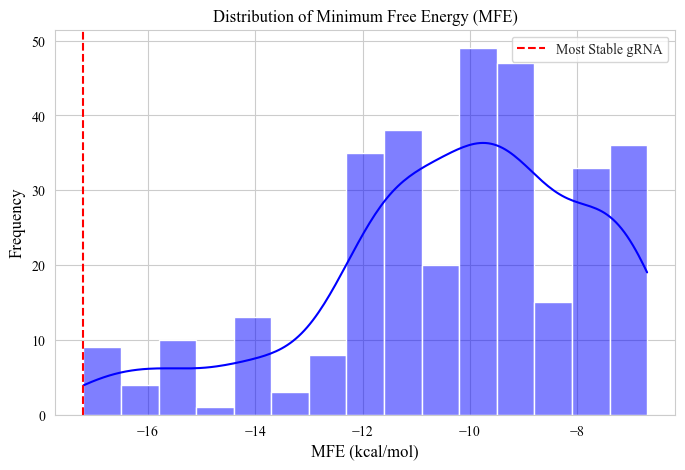

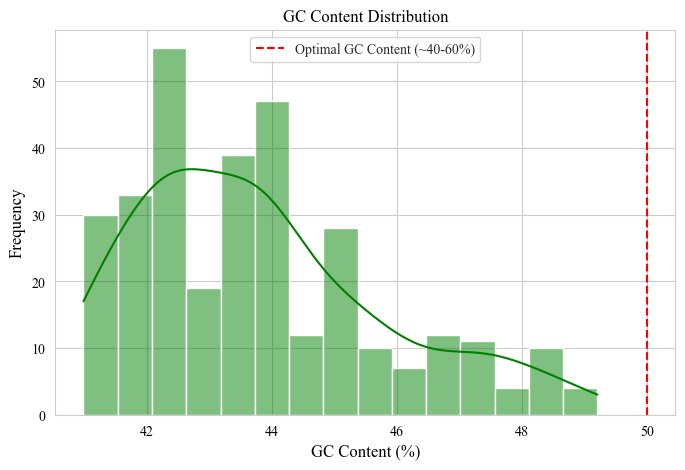

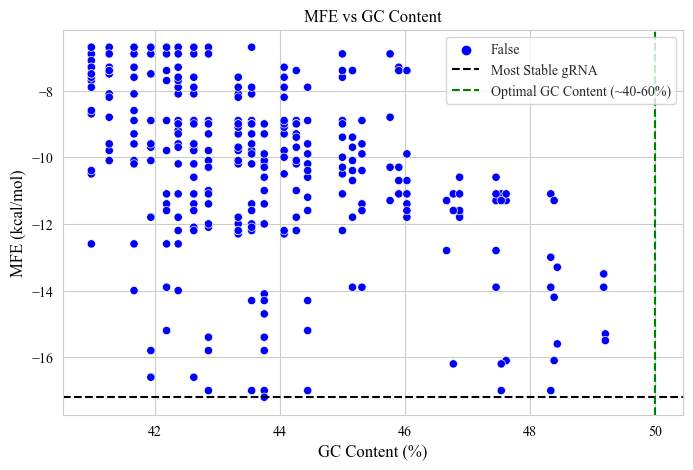

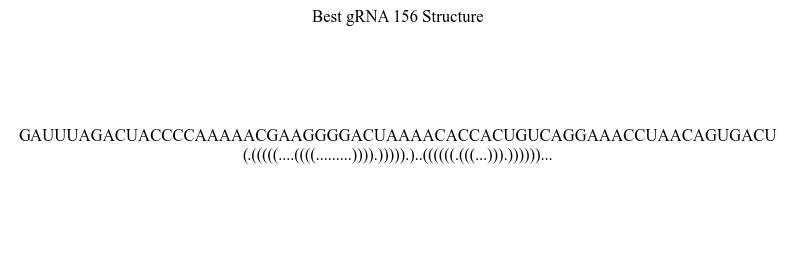

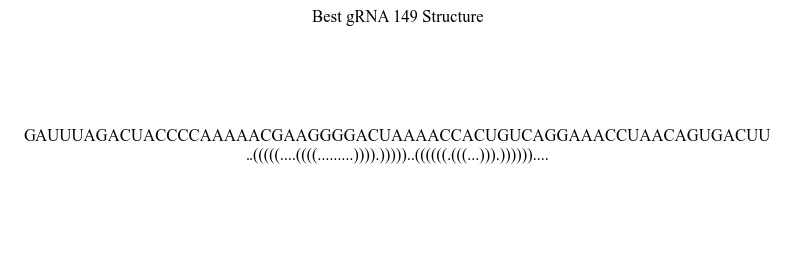

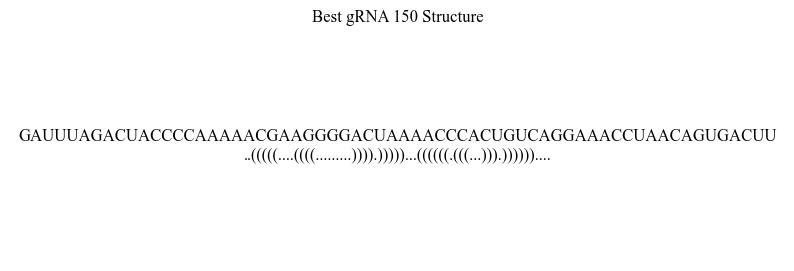


Top 3 Best Guide RNA Sequences:
                                          RNA Sequence        MFE  GC Content  \
155  GAUUUAGACUACCCCAAAAACGAAGGGGACUAAAACACCACUGUCA... -17.200001   43.750000   
148  GAUUUAGACUACCCCAAAAACGAAGGGGACUAAAACCACUGUCAGG... -17.000000   42.857143   
149  GAUUUAGACUACCCCAAAAACGAAGGGGACUAAAACCCACUGUCAG... -17.000000   43.750000   

     Self-Dimer  
155       False  
148       False  
149       False  


In [9]:
import pandas as pd
import RNA  # ViennaRNA Python API
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define input and output file paths
input_file = r"C:\Users\AFRAA\OneDrive\Desktop\crispr\seqs\CleanedGuideRNA.tsv"
output_file = r"C:\Users\AFRAA\OneDrive\Desktop\crispr\seqs\RNA_Analysis_Results.tsv"
fig_output_dir = r"C:\Users\AFRAA\OneDrive\Desktop\crispr\seqs\fig"

# Ensure output directory exists
os.makedirs(fig_output_dir, exist_ok=True)

# Load the TSV file
df = pd.read_csv(input_file, sep='\t')

# Ensure the required column exists
if "Final guide RNA" not in df.columns:
    raise ValueError("Column 'Final guide RNA' not found in the input file.")

# Function to predict RNA secondary structure and MFE using ViennaRNA Python API
def predict_secondary_structure(rna_sequence):
    fold_comp = RNA.fold_compound(rna_sequence)
    structure, mfe = fold_comp.mfe()
    return structure, mfe

# Function to check self-dimerization (simple sequence complementarity check)
def check_self_dimerization(rna_sequence):
    complement = rna_sequence.replace("A", "U").replace("U", "A").replace("C", "G").replace("G", "C")
    return complement in rna_sequence  # True if RNA has self-complementary regions

# Function to calculate GC content (affects stability)
def gc_content(sequence):
    gc_count = sequence.count("G") + sequence.count("C")
    return (gc_count / len(sequence)) * 100  # GC percentage

# Run analysis
results = []
for sequence in df["Final guide RNA"].dropna():
    structure, mfe = predict_secondary_structure(sequence)
    dimer_check = check_self_dimerization(sequence)
    gc = gc_content(sequence)
    
    results.append({
        "RNA Sequence": sequence, 
        "MFE": mfe, 
        "Structure": structure, 
        "Self-Dimer": dimer_check,
        "GC Content": gc
    })

# Convert results to DataFrame
output_df = pd.DataFrame(results)

# Save results to file
output_df.to_csv(output_file, sep="\t", index=False)
print(f"Analysis completed! Results saved to {output_file}")

# Select top 3 best guide RNAs (lowest MFE, no dimerization, optimal GC)
best_gRNAs = output_df[(output_df["Self-Dimer"] == False)].nsmallest(3, "MFE")

# --- PLOTTING GRAPHS FOR ANALYSIS ---

# Set style
sns.set_style("whitegrid")
plt.rcParams["font.family"] = "Times New Roman"  # Set font

# Plot 1: MFE distribution (stability)
plt.figure(figsize=(8, 5))
sns.histplot(output_df["MFE"], bins=15, kde=True, color="blue")
plt.axvline(best_gRNAs["MFE"].min(), color='red', linestyle='dashed', label="Most Stable gRNA")
plt.title("Distribution of Minimum Free Energy (MFE)", fontsize=12, color='black')
plt.xlabel("MFE (kcal/mol)", fontsize=12, color='black')
plt.ylabel("Frequency", fontsize=12, color='black')
plt.xticks(color='black')
plt.yticks(color='black')
plt.legend()
plt.savefig(os.path.join(fig_output_dir, "MFE_Distribution.tif"), dpi=400, format="tiff")
plt.show()

# Plot 2: GC Content Distribution
plt.figure(figsize=(8, 5))
sns.histplot(output_df["GC Content"], bins=15, kde=True, color="green")
plt.axvline(50, color='red', linestyle='dashed', label="Optimal GC Content (~40-60%)")
plt.title("GC Content Distribution", fontsize=12, color='black')
plt.xlabel("GC Content (%)", fontsize=12, color='black')
plt.ylabel("Frequency", fontsize=12, color='black')
plt.xticks(color='black')
plt.yticks(color='black')
plt.legend()
plt.savefig(os.path.join(fig_output_dir, "GC_Content_Distribution.tif"), dpi=400, format="tiff")
plt.show()

# Plot 3: MFE vs GC Content (Best Balance Selection)
plt.figure(figsize=(8, 5))
sns.scatterplot(x="GC Content", y="MFE", data=output_df, hue="Self-Dimer", palette={True: "red", False: "blue"})
plt.axhline(best_gRNAs["MFE"].min(), color='black', linestyle='dashed', label="Most Stable gRNA")
plt.axvline(50, color='green', linestyle='dashed', label="Optimal GC Content (~40-60%)")
plt.title("MFE vs GC Content", fontsize=12, color='black')
plt.xlabel("GC Content (%)", fontsize=12, color='black')
plt.ylabel("MFE (kcal/mol)", fontsize=12, color='black')
plt.xticks(color='black')
plt.yticks(color='black')
plt.legend()
plt.savefig(os.path.join(fig_output_dir, "MFE_vs_GC_Content.tif"), dpi=400, format="tiff")
plt.show()

# --- RNA STRUCTURE VISUALIZATION ---
for idx, row in best_gRNAs.iterrows():
    seq = row["RNA Sequence"]
    structure = row["Structure"]
    
    plt.figure(figsize=(10, 3))
    plt.text(0.5, 0.5, f"{seq}\n{structure}", fontsize=12, fontfamily="Times New Roman",
             ha="center", va="center", color='black')
    plt.title(f"Best gRNA {idx+1} Structure", fontsize=12, fontfamily="Times New Roman", color='black')
    plt.axis("off")
    
    file_name = f"Best_gRNA_{idx+1}_Structure.tif"
    plt.savefig(os.path.join(fig_output_dir, file_name), dpi=400, format="tiff")
    plt.show()

# --- PRINT BEST 3 GUIDE RNAs ---
print("\nTop 3 Best Guide RNA Sequences:")
print(best_gRNAs[["RNA Sequence", "MFE", "GC Content", "Self-Dimer"]])

